In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tabulate import tabulate

def odes (x,t):
    Kag = 0.0151     # First order absorbtion 
    Gprod = Gss* (CLg + (Clgi*Iss))            # endogenous glucose produced
    Q = 0.442        # Intercompartmental Clearance
    CLg = 0.0287     # Insulin independent clearance
    CLgi = 0.0074    # Insulin dependent clearance
    Gss = 158        # Glucose in central compartment at steady state
    Kge = 0.123      # equilibration rate constant
    Iss = 10         # Insulin concetration at steady state
    Cli = 1.22       # Insulin clearance
    Sincr = 0.000994 # Slope of linear relation ship
    Kie = 0.00773    # Equilibratio rate constant to and from the Insulin effect compartment
    IPRG = 1.42      # Estimated Power in the relation ship
    Vp = 8.56        # Volume of peripheral 
    Vg = 9.33        # Volume of central
    Vi = 6.09        # Volume of Insulin
    Isec0 = Isec - (CLi/Vi)*I           # Baseline insulin secretion
    Gcm = (Ge/Gss)^IPRG             # Fraction of Insulin secretion regulated by glucose concentration 
    Iabsg = 1 + Sincr*Ga           # Fraction of insulin secretion triggered by the incretin effect following glucose absorbtion from the gut
    Isec = Isec0 * Gcm * Iabsg            # Endogenous insulin secretion
    

    Ga = x[0]
    Gc = x[1]
    Gp = x[2]
    Ge = x[3]
    I  = x[4]
    Ie = x[5]
    
    dGadt = -Ga*Kag     # IC Ga = 0 
    dGcdt = Kag*Ga + Gprod + (Q/Vp)* Gp-(CLg+ CLgi + Ie + Q)*(Gc/Vg) #IC Gc0 = Gss * Vg
    dGpdt = Q * ((Gc/Vg) - (Gp/Vp)) # IC Gp0 = Gss * Vp
    dGedt = Kge * (Gc/Vg) - Kge * Ge  # IC Ge0 = Gss  
    dIdt  = Isec - (CLi/Vi) * I     # IC I0 = Iss * Vi
    dIedt = Kie * (I/Vi) - Kie * Ie  # IC Ie0 = Iss
    
    return [dGadt, dGcdt, dGpdt, dGedt, dIdt, dIedt]
                
x0 = [100, , Gss * Vp, Gss, Iss * Vi, Iss ]   
    
t = np.linspace(0,500,120)
    
x = odeint(odes,x0,t)
    
print(odes(x=x0,t=0))
    
plt.plot(t,Ga)
plt.plot(t,Gc)
plt.plot(t,Gp)
plt.plot(t,Ge)
plt.plot(t,I)
plt.plot(t,Ie)
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-e9c45683c646>, line 44)

[-1.51, -1617.1489943925235, 49.18179439252337, -17.465999999999998, 21.137626875732675, 0.0]


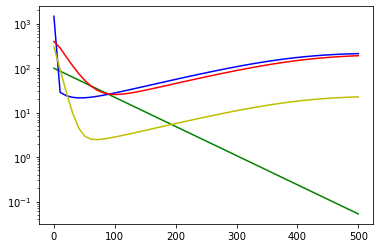

In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
 
def odes (x,t):
    Kag = 0.0151     # First order absorbtion 
    Q = 0.442        # Intercompartmental Clearance
    CLg = 0.0287     # Insulin independent clearance
    CLgi = 0.0074    # Insulin dependent clearance
    Gss = 158        # Glucose in central compartment at steady state
    Kge = 0.123      # equilibration rate constant
    Iss = 10         # Insulin concetration at steady state
    CLi = 1.22       # Insulin clearance
    Sincr = 0.000994 # Slope of linear relation ship
    Kie = 0.00773    # Equilibratio rate constant to and from the Insulin effect compartment
    IPRG = 1.42      # Estimated Power in the relation ship
    Vp = 8.56        # Volume of peripheral 
    Vg = 9.33        # Volume of central
    Vi = 6.09        # Volume of Insulin
    

    Ga    = x[0]
    Gc    = x[1]
    Gp    = x[2]
    Ge    = x[3]
    I     = x[4]
    Ie    = x[5]
    
    Gprod = Gss* (CLg + (CLgi*Iss))
    Gcm   = (Ge/Gss)**IPRG
    Iabsg = 1 + Sincr*Ga
    Isec0 = CLi * Iss
    Isec  = Isec0 * Gcm * Iabsg
    #Isec0 = Isec - (CLi/Vi)*I
    
    
    
    dGadt = -Ga*Kag     # IC Ga = 0 
    dGcdt = Kag*Ga + Gprod + (Q/Vp)* Gp-(CLg+ CLgi + Ie + Q)*(Gc/Vg) #IC Gc0 = Gss * Vg
    dGpdt = Q * ((Gc/Vg) - (Gp/Vp)) # IC Gp0 = Gss * Vp
    dGedt = Kge * (Gc/Vg) - Kge * Ge  # IC Ge0 = Gss  
    dIdt  = Isec - (CLi/Vi) * I     # IC I0 = Iss * Vi
    dIedt = Kie * (I/Vi) - Kie * Ie  # IC Ie0 = Iss
    
    
    return [dGadt, dGcdt, dGpdt, dGedt, dIdt, dIedt]

Gss = 158        # Glucose in central compartment at steady state
Vg = 9.33        # Volume of central
Iss = 10         # Insulin concetration at steady state
Vi = 6.09        # Volume of Insulin
CLi = 1.22       # Insulin clearance
#Isec0 = CLi * Iss
#I0 = Iss*Vi

x0 = [100, Gss*Vg, 400, 300, Iss*Vi, 10 ] 

print(odes(x=x0,t=0))

t = np.linspace(0,500)
    
x = odeint(odes,x0,t)
    
Ga    = x[:,0]
Gc    = x[:,1]
Gp    = x[:,2]
Ge    = x[:,3]
I     = x[:,4]
Ie    = x[:,5]
    

plt.plot(t,Ga, "g")
plt.plot(t,Gc, "b")
plt.plot(t,Gp, "r")
plt.plot(t,Ge, "y")
plt.yscale("log")
zplt.show()
    
    
    

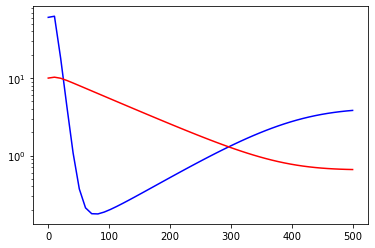

In [44]:
plt.plot(t,I,  "b")
plt.plot(t,Ie, "r")
plt.yscale("log")
plt.show()

In [ ]:
Isec0            # Baseline insulin secretion
    Gcm              # Fraction of Insulin secretion regulated by glucose concentration 
    Iabsg            # Fraction of insulin secretion triggered by the incretin effect following glucose absorbtion from the gut
    Isec             # Endogenous insulin secretion
    Gprod             # endogenous glucose produced

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def odes (x,t):
    Kag = 0.0151     # First order absorbtion 
    Gprod             # endogenous glucose produced
    Q = 0.442        # Intercompartmental Clearance
    CLg = 0.0287     # Insulin independent clearance
    CLgi = 0.0074    # Insulin dependent clearance
    Gss = 158        # Glucose in central compartment at steady state
    Kge = 0.123      # equilibration rate constant
    Iss = 10         # Insulin concetration at steady state
    Cli = 1.22       # Insulin clearance
    Sincr = 0.000994 # Slope of linear relation ship
    Kie = 0.00773    # Equilibratio rate constant to and from the Insulin effect compartment
    IPRG = 1.42      # Estimated Power in the relation ship
    Vp = 8.56        # Volume of peripheral 
    Vg = 9.33        # Volume of central
    Vi = 6.09        # Volume of Insulin
    Isec0            # Baseline insulin secretion
    Gcm              # Fraction of Insulin secretion regulated by glucose concentration 
    Iabsg            # Fraction of insulin secretion triggered by the incretin effect following glucose absorbtion from the gut
    Isec             # Endogenous insulin secretion
    

    Ga    = x[0]
    Gc    = x[1]
    Gp    = x[2]
    Ge    = x[3]
    I     = x[4]
    Ie    = x[5]
    Gprod = x[6]
    Isec0 = x[7]
    Gcm   = x[8]
    Iabsg = x[9]
    Isec  = x[10]
    
    dGadt = -Ga*Kag     # IC Ga = 0 
    dGcdt = Kag*Ga + Gprod + (Q/Vp)* Gp-(CLg+ CLgi + Ie + Q)*(Gc/Vg) #IC Gc0 = Gss * Vg
    dGpdt = Q * ((Gc/Vg) - (Gp/Vp)) # IC Gp0 = Gss * Vp
    dGedt = Kge * (Gc/Vg) - Kge * Ge  # IC Ge0 = Gss  
    dIdt  = Isec - (CLi/Vi) * I     # IC I0 = Iss * Vi
    dIedt = Kie * (I/Vi) - Kie * Ie  # IC Ie0 = Iss
    Gprod = Gss* (CLg + (Clgi*Iss))
    Isec0 = Isec - (CLi/Vi)*I
    Gcm   = (Ge/Gss)^IPRG
    Iabsg = 1 + Sincr*Ga
    Isec  = Isec0 * Gcm * Iabsg
    
    return [dGadt, dGcdt, dGpdt, dGedt, dIdt, dIedt]
                
x0 [100, Gss * Vg, Gss * Vp, Gss, Iss * Vi, Iss,300, 10, 0.2, 0.3, 15 ]    
    
t = np.linspace(0,500)
    
x = odeint(odes,x0,t)
    
print(odes(x=x0,t=0))
    
plt.plot(t,Ga)
plt.plot(t,Gc)
plt.plot(t,Gp)
plt.plot(t,Ge)
plt.plot(t,I)
plt.plot(t,Ie)
plt.show()
    
    
    

NameError: name 'Gss' is not defined

[-1.51, -539.3631255822339, 3.0328254750528396, -30.308360128617363, -12.019704433497537, -0.001142364532019699, 16.2266, -12.019704433497537, 2.485530622942818, 1.0994, -32.84495258692874]


C:\Users\luffy\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


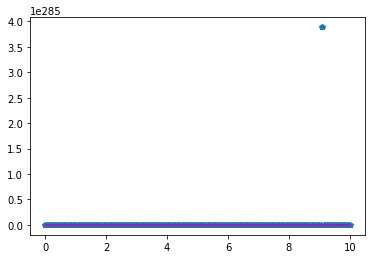

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def odes (x,t):
    Kag = 0.0151     # First order absorbtion 
    Q = 0.442        # Intercompartmental Clearance
    CLg = 0.0287     # Insulin independent clearance
    CLgi = 0.0074    # Insulin dependent clearance
    Gss = 158        # Glucose in central compartment at steady state
    Kge = 0.123      # equilibration rate constant
    Iss = 10         # Insulin concetration at steady state
    CLi = 1.22       # Insulin clearance
    Sincr = 0.000994 # Slope of linear relation ship
    Kie = 0.00773    # Equilibratio rate constant to and from the Insulin effect compartment
    IPRG = 1.42      # Estimated Power in the relation ship
    Vp = 8.56        # Volume of peripheral 
    Vg = 9.33        # Volume of central
    Vi = 6.09        # Volume of Insulin
    
    

    Ga    = x[0]
    Gc    = x[1]
    Gp    = x[2]
    Ge    = x[3]
    I     = x[4]
    Ie    = x[5]
    Gprod = x[6]
    Isec0 = x[7]
    Gcm   = x[8]
    Iabsg = x[9]
    Isec  = x[10]
    
    dGadt = -Ga*Kag     # IC Ga = 0 
    dGcdt = Kag*Ga + Gprod + (Q/Vp)* Gp-(CLg+ CLgi + Ie + Q)*(Gc/Vg) #IC Gc0 = Gss * Vg
    dGpdt = Q * ((Gc/Vg) - (Gp/Vp)) # IC Gp0 = Gss * Vp
    dGedt = Kge * (Gc/Vg) - Kge * Ge  # IC Ge0 = Gss  
    dIdt  = Isec - (CLi/Vi) * I     # IC I0 = Iss * Vi
    dIedt = Kie * (I/Vi) - Kie * Ie  # IC Ie0 = Iss
    Gprod = Gss* (CLg + (CLgi*Iss))
    Isec0 = Isec - (CLi/Vi)*I
    Gcm   = (Ge/Gss)**IPRG
    Iabsg = 1 + Sincr*Ga
    Isec  = Isec0 * Gcm * Iabsg
    
    return [dGadt, dGcdt, dGpdt, dGedt, dIdt, dIedt, Gprod, Isec0, Gcm, Iabsg, Isec]


x0 = [100, 500, 400, 300, 60, 10, 0, 10, 0, 0, 0 ] 

print(odes(x=x0,t=0))

t = np.linspace(0,10,200)
    
x = odeint(odes,x0,t)
    
Ga    = x[:,0]
Gc    = x[:,1]
Gp    = x[:,2]
Ge    = x[:,3]
I     = x[:,4]
Ie    = x[:,5]
Gprod = x[:,6]
Isec0 = x[:,7]
Gcm   = x[:,8]
Iabsg = x[:,9]
Isec  = x[:,10]
    

    
plt.plot(t,Ga, "g")
plt.plot(t,Gc, "b")
plt.plot(t,Gp, "r")
plt.plot(t,Ge, "y")
plt.plot(t,I,  "p")
plt.plot(t,Ie, "m")
plt.show()
    
Gc    = x[0:160,1]
plt.plot(t,Gc, "b")  
    

In [15]:
pip install tabulate
from tabulate import tabulate

t2 = t[0:160]
Gc2   = x[0:160,1]
plt.plot(t2,Gc2, "b")  
print (t, Gc,Gp,Ga)

data = [[t],[Gp],[Gc],[Ga]] 
print (tabulate(data, headers=["time", "Gp", "Gc", "Ga"]))

from tabulate import tabulate
data = [[1, 'Liquid', 24, 12],
[2, 'Virtus.pro', 19, 14],
[3, 'PSG.LGD', 15, 19],
[4,'Team Secret', 10, 20]] 
print (tabulate(data, headers=["Pos", "Team", "Win", "Lose"]))

SyntaxError: invalid syntax (<ipython-input-15-49c8b6633a4f>, line 1)

In [16]:
pip install tabulate
from tabulate import tabulate


SyntaxError: invalid syntax (<ipython-input-16-3f8191856515>, line 1)